<a href="https://colab.research.google.com/github/Eduardostca/ML_/blob/main/Graded_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-14 | veh18.csv |
| 15-18 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number 14
 - Group Members

Noushin Asadsamani (0829532)

Eduardo Chavez Barrientos (0828349)

Prasanna Kumar Loganathan (0827541)



### Part 1 - Create and evaluate an initial model

In this part you should:
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model

#### Code (15 marks)

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from rfpimp import *

### -- Reading the data:

In [4]:
df = pd.read_csv('https://github.com/Eduardostca/ML_/blob/main/veh18.csv?raw=true')
df

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,4.0,8,26.6603,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N
2,6.0,12,20.4316,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
3,6.0,12,21.3382,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
4,1.5,3,36.7632,6,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.0,4,34.2176,8,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,N
1159,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1160,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1161,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1163 non-null   float64
 1   # Cyl                              1163 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1163 non-null   float64
 3   # Gears                            1163 non-null   int64  
 4   Max Ethanol % - Gasoline           1163 non-null   float64
 5   Intake Valves Per Cyl              1163 non-null   int64  
 6   Exhaust Valves Per Cyl             1163 non-null   int64  
 7   Fuel Metering Sys Desc             1163 non-null   object 
 8   Air Aspiration Method Desc         1163 non-null   object 
 9   Trans Desc                         1163 non-null   object 
 10  Cyl Deact?                         1163 non-null   object 
 11  Var Valve Lift?                    1163 non-null   objec

### -- Isolating all numeric features:

In [6]:
df_num = df.select_dtypes(include = 'number')
df_num

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl
0,5.2,12,22.8444,8,10.0,2,2
1,4.0,8,26.6603,8,10.0,2,2
2,6.0,12,20.4316,8,10.0,2,2
3,6.0,12,21.3382,8,10.0,2,2
4,1.5,3,36.7632,6,10.0,2,2
...,...,...,...,...,...,...,...
1158,2.0,4,34.2176,8,10.0,2,2
1159,3.8,8,23.7711,7,10.0,2,2
1160,3.8,8,23.7711,7,10.0,2,2
1161,3.8,8,23.7711,7,10.0,2,2


### -- Verifying missing values:

In [7]:
df.isna().sum()

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Fuel Metering Sys Desc               0
Air Aspiration Method Desc           0
Trans Desc                           0
Cyl Deact?                           0
Var Valve Lift?                      0
dtype: int64

### -- Creating a baseline model:

In [8]:
X1 = df_num.drop(['Comb Unadj FE - Conventional Fuel'], axis=1)
y1 = df_num['Comb Unadj FE - Conventional Fuel']

In [9]:
oob_scores1 = []
predictions_1 =[]
for i in range(10):
    model_1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
    model_1.fit(X1_train, y1_train)
    oob_scores1.append(model_1.oob_score_)

avg_oob_scores_1 = sum(oob_scores1) / len(oob_scores1)
print(f"Average OOB score over 10 runs for model 1: {avg_oob_scores_1:.4f}")

Average OOB score over 10 runs for model 1: 0.6873


### Question (5 marks)
#### Explain the purpose of creating a baseline model.

A baseline model works as a reference point to compare the performance of more complex models and have a better understanding if the model improvements are effective or not. It also helps to ensure that the data is properly prepared for the model and the implementation is correct. It helps to identify any major issues or anomalies in the data. If the baseline model performance is poor, further fixes are needed to improve it.

### Part 2 - Convert non-numeric features to numeric

In this part you should:
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features

#### Code (25 marks)

## -- Converting all non-numeric features:

In [10]:
df_obj = df.select_dtypes(include = 'object')
df_obj

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N
2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
3,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
4,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,Y
...,...,...,...,...,...
1158,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,N
1159,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1160,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1161,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N


In [11]:
# Making sure that there are not NaN as strings:
columns = ['Fuel Metering Sys Desc', 'Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?', 'Var Valve Lift?']
for column in columns:
    print(df_obj[[column]].value_counts(dropna=False), "\n")

Fuel Metering Sys Desc                  
Spark Ignition Direct Injection             834
Multipoint/sequential fuel injection        251
Spark Ignition direct & ported injection     78
dtype: int64 

Air Aspiration Method Desc
Turbocharged                  614
Naturally Aspirated           489
Supercharged                   51
Turbocharged+Supercharged       9
dtype: int64 

Trans Desc                                                       
Semi-Automatic                                                       529
Automatic                                                            246
Manual                                                               165
Automated Manual- Selectable (e.g. Automated Manual with paddles)    103
Selectable Continuously Variable (e.g. CVT with paddles)              46
Automated Manual                                                      45
Continuously Variable                                                 29
dtype: int64 

Cyl Deact?
N             1017


In [12]:
# Converting categorical feature 'Fuel Metering Sys Desc':
df_obj['Fuel Metering Sys Desc'] = df_obj['Fuel Metering Sys Desc'].values
df_obj['Fuel Metering Sys Desc'] = df_obj['Fuel Metering Sys Desc'].replace('None or Unspecified', np.nan)
onehot1 = pd.get_dummies(df_obj['Fuel Metering Sys Desc'],
                        prefix='Fuel Sys',
                        dtype=int)
del df_obj['Fuel Metering Sys Desc']
df_obj = pd.concat([df_obj, onehot1], axis=1)

In [13]:
# Converting categorical feature 'Air Aspiration Method Desc':
df_obj['Air Aspiration Method Desc'] = df_obj['Air Aspiration Method Desc'].values
df_obj['Air Aspiration Method Desc'] = df_obj['Air Aspiration Method Desc'].replace('None or Unspecified', np.nan)
onehot2 = pd.get_dummies(df_obj['Air Aspiration Method Desc'],
                        prefix='Air Asp',
                        dtype=int)
del df_obj['Air Aspiration Method Desc']
df_obj = pd.concat([df_obj, onehot2], axis=1)

In [14]:
# Converting categorical feature 'Trans Desc':
df_obj['Trans Desc'] = df_obj['Trans Desc'].values
df_obj['Trans Desc'] = df_obj['Trans Desc'].replace('None or Unspecified', np.nan)
onehot3 = pd.get_dummies(df_obj['Trans Desc'],
                        prefix='Trans Desc',
                        dtype=int)
del df_obj['Trans Desc']
df_obj = pd.concat([df_obj, onehot3], axis=1)

In [15]:
# Converting categorical feature 'Cyl Deact?':
df_obj['Cyl Deact?'] = df_obj['Cyl Deact?'].map({'N':0,'Y':1})
df_obj['Cyl Deact_cat'] = df_obj['Cyl Deact?'].astype('category').cat.codes + 1
del df_obj['Cyl Deact?']
print(df_obj['Cyl Deact_cat'].value_counts());

1    1017
2     146
Name: Cyl Deact_cat, dtype: int64


In [16]:
# Converting categorical feature 'Var Valve Lift?':
df_obj['Var Valve Lift?'] = df_obj['Var Valve Lift?'].map({'N': 0, 'Y': 1})
df_obj['Var Valve Lift_cat'] = df_obj['Var Valve Lift?'].astype('category').cat.codes + 1
del df_obj['Var Valve Lift?']
print(df_obj['Var Valve Lift_cat'].value_counts());

1    806
2    357
Name: Var Valve Lift_cat, dtype: int64


## -- Creating a new feature by combining 2 existing

In [17]:
df_obj['Valves Per Cyl'] = df_num['Intake Valves Per Cyl'] + df_num['Exhaust Valves Per Cyl']
df_obj

,Fuel Sys_Multipoint/sequential fuel injection,Fuel Sys_Spark Ignition Direct Injection,Fuel Sys_Spark Ignition direct & ported injection,Air Asp_Naturally Aspirated,Air Asp_Supercharged,Air Asp_Turbocharged,Air Asp_Turbocharged+Supercharged,Trans Desc_Automated Manual,Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles),Trans Desc_Automatic,Trans Desc_Continuously Variable,Trans Desc_Manual,Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles),Trans Desc_Semi-Automatic,Cyl Deact_cat,Var Valve Lift_cat,Valves Per Cyl
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,4
1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,4
2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,4
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,4
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,4
1159,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4
1160,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4
1161,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4


In [18]:
X2 = df_obj
y2 = df_num['Comb Unadj FE - Conventional Fuel']

In [19]:
oob_scores2 = []
predictions_2 =[]
for i in range(10):
    model_2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
    model_2.fit(X2_train, y2_train)
    oob_scores2.append(model_2.oob_score_)

avg_oob_scores_2 = sum(oob_scores2) / len(oob_scores2)
print(f"Average OOB score over 10 runs for model 2: {avg_oob_scores_2:.4f}")

Average OOB score over 10 runs for model 2: 0.4506


#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.

Features 'Fuel Metering Sys Desc' has 3 categories, 'Air Aspiration Method Desc' has 3 categories and 'Trans Desc' has 7 categories. Since the number of category levels in each feature is relatively small (less than 10).So, We perform the one-hot encoding process on these three features, where each category's presence is indicated by a binary value.

We create a new column for each category in every variable and assign a binary value of 0 or 1. If the record contains the value corresponding to that category, we assign 1; otherwise, we assign 0.

Features "Cyl Deact?" and "Var Valve Lift?" that have Yes/No values, doesn't  indicate any particular order or hierarchy between the two values. Therefore, these types of features are considered nominal variables. These featres values were converted into numeric values using label encoding. This involves replacing the "Yes" and "No" values with numerical labels. For instance, "Yes" is 2 , and "No" is 1.


### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above

#### Code (15 marks)

In [20]:
data = [df_num, df_obj]
df_tot = pd.concat(data, axis = 1)
df_tot

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Sys_Multipoint/sequential fuel injection,Fuel Sys_Spark Ignition Direct Injection,Fuel Sys_Spark Ignition direct & ported injection,...,Trans Desc_Automated Manual,Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles),Trans Desc_Automatic,Trans Desc_Continuously Variable,Trans Desc_Manual,Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles),Trans Desc_Semi-Automatic,Cyl Deact_cat,Var Valve Lift_cat,Valves Per Cyl
0,5.2,12,22.8444,8,10.0,2,2,1,0,0,...,0,0,0,0,0,0,1,2,1,4
1,4.0,8,26.6603,8,10.0,2,2,1,0,0,...,0,0,0,0,0,0,1,1,1,4
2,6.0,12,20.4316,8,10.0,2,2,1,0,0,...,0,0,0,0,0,0,1,1,1,4
3,6.0,12,21.3382,8,10.0,2,2,1,0,0,...,0,0,0,0,0,0,1,1,1,4
4,1.5,3,36.7632,6,10.0,2,2,0,1,0,...,0,0,0,0,0,0,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.0,4,34.2176,8,10.0,2,2,0,1,0,...,0,0,0,0,0,0,1,1,1,4
1159,3.8,8,23.7711,7,10.0,2,2,1,0,0,...,0,0,1,0,0,0,0,1,1,4
1160,3.8,8,23.7711,7,10.0,2,2,1,0,0,...,0,0,1,0,0,0,0,1,1,4
1161,3.8,8,23.7711,7,10.0,2,2,1,0,0,...,0,0,1,0,0,0,0,1,1,4


In [21]:
X3 = df_tot.drop(['Comb Unadj FE - Conventional Fuel'], axis = 1)
y3 = df_tot['Comb Unadj FE - Conventional Fuel']

In [22]:
oob_scores3 = []
predictions_3 =[]
for i in range(10):
    model_3 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)
    model_3.fit(X3_train, y3_train)
    oob_scores3.append(model_3.oob_score_)

avg_oob_scores_3 = sum(oob_scores3) / len(oob_scores3)
print(f"Average OOB score over 10 runs for model 3: {avg_oob_scores_3:.4f}")

Average OOB score over 10 runs for model 3: 0.8512


### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference)
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [23]:
print(avg_oob_scores_1)
print(avg_oob_scores_3)

0.6872604404539354
0.8511503408914429


In [24]:
percent_difference = abs(avg_oob_scores_1 - avg_oob_scores_3) / ((avg_oob_scores_1 + avg_oob_scores_3) / 2) * 100
print(f"The percent difference between the results of Part 1 and Part 3 is: {percent_difference:.2f}%")

The percent difference between the results of Part 1 and Part 3 is: 21.31%


In [25]:
# Defining the Function:
def showimp(rf, X, y):
    features = list(X.columns)

    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

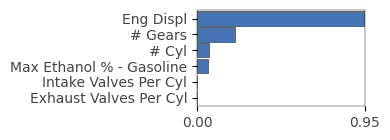

In [26]:
# Feature importances - Part 1

showimp(model_1, X1, y1)

/usr/local/lib/python3.10/dist-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


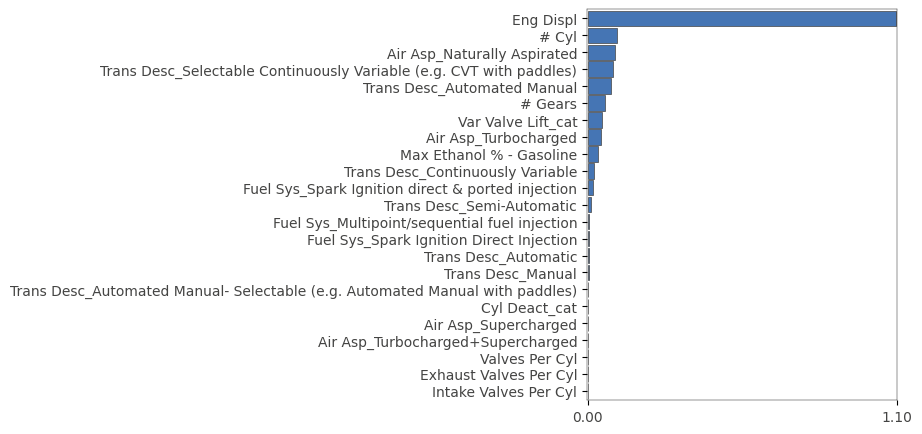

In [27]:
# Feature importances - Part 3

showimp(model_3, X3, y3)

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed?

We can exclude the 'Intake Valves Per Cyl' and 'Exhaust Valves Per Cyl' features as they have minimal impact on our model.

In [28]:
df_final = df_tot.drop(['Cyl Deact_cat', 'Trans Desc_Manual', 'Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles)', 'Air Asp_Supercharged', 'Air Asp_Turbocharged+Supercharged', 'Valves Per Cyl' ,'Intake Valves Per Cyl', 'Exhaust Valves Per Cyl'], axis=1)
df_final

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Fuel Sys_Multipoint/sequential fuel injection,Fuel Sys_Spark Ignition Direct Injection,Fuel Sys_Spark Ignition direct & ported injection,Air Asp_Naturally Aspirated,Air Asp_Turbocharged,Trans Desc_Automated Manual,Trans Desc_Automatic,Trans Desc_Continuously Variable,Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles),Trans Desc_Semi-Automatic,Var Valve Lift_cat
0,5.2,12,22.8444,8,10.0,1,0,0,0,1,0,0,0,0,1,1
1,4.0,8,26.6603,8,10.0,1,0,0,0,1,0,0,0,0,1,1
2,6.0,12,20.4316,8,10.0,1,0,0,1,0,0,0,0,0,1,1
3,6.0,12,21.3382,8,10.0,1,0,0,1,0,0,0,0,0,1,1
4,1.5,3,36.7632,6,10.0,0,1,0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.0,4,34.2176,8,10.0,0,1,0,0,1,0,0,0,0,1,1
1159,3.8,8,23.7711,7,10.0,1,0,0,0,1,0,1,0,0,0,1
1160,3.8,8,23.7711,7,10.0,1,0,0,0,1,0,1,0,0,0,1
1161,3.8,8,23.7711,7,10.0,1,0,0,0,1,0,1,0,0,0,1


In [29]:
X4 = df_final.drop(['Comb Unadj FE - Conventional Fuel'], axis = 1)
y4 = df_final['Comb Unadj FE - Conventional Fuel']

In [30]:
oob_scores4 = []
predictions_4 =[]
for i in range(10):
    model_4 = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)
    model_4.fit(X4_train, y4_train)
    oob_scores4.append(model_4.oob_score_)

avg_oob_scores_4 = sum(oob_scores4) / len(oob_scores4)
print(f"Average OOB score over 10 runs for model 4: {avg_oob_scores_4:.4f}")

Average OOB score over 10 runs for model 4: 0.8687


In [31]:
print(avg_oob_scores_3)
print(avg_oob_scores_4)

0.8511503408914429
0.8686860547389165


In [32]:
percent_difference = abs(avg_oob_scores_3 - avg_oob_scores_4) / ((avg_oob_scores_3 + avg_oob_scores_4) / 2) * 100
print(f"The percent difference between the results of Part 3 and Part 4 is: {percent_difference:.2f}%")

The percent difference between the results of Part 3 and Part 4 is: 2.04%
